In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (2.0,2.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [40]:
def cartoonify(image, arguments=0):
    ### Edge preserved image
    impres = cv2.edgePreservingFilter(image, flags=cv2.NORMCONV_FILTER, sigma_s=0.2, sigma_r=0.01);
    
    img_presgray = cv2.cvtColor(impres, cv2.COLOR_BGR2GRAY)
    # Sobel Edge Detection
    sobelxy = cv2.Sobel(src=img_presgray, ddepth=cv2.CV_8U, dx=2, dy=2, ksize=5) # Combined X and Y Sobel Edge Detection
    intsobel=np.uint8(sobelxy)
    ret,edgeSketch=cv2.threshold(intsobel, 70, 255, cv2.THRESH_BINARY_INV)
    edgeSketchIm=cv2.cvtColor(edgeSketch, cv2.COLOR_GRAY2BGR)    
    #Blend the pencil sketch with the edge preserved image
    alpha = edgeSketchIm[:,:,0]
    alpha = cv2.merge([alpha,alpha,alpha])
    cartoonImage=np.where(alpha==(0,0,0), edgeSketchIm, impres)

    return cartoonImage

In [41]:
def pencilSketch(image, arguments=0):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurkernel_size=3
    img_blur = cv2.GaussianBlur(img_gray, (blurkernel_size,blurkernel_size), 0) 
    #Laplacian process to get the plot of second derivative
    lapkernel_size=7
    lap = cv2.Laplacian(img_blur, cv2.CV_32F, ksize = lapkernel_size, scale = 1, delta = 0)
# Normalize results
    cv2.normalize(lap, 
                dst = lap, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
    intlap=np.uint8(lap*255)
    n, b, patches =plt.hist(intlap.ravel(),256,[0,256]); 

    bin_max = np.where(n == n.max())
    peakvalue=int(b[bin_max][0])
    cleanlap=intlap.copy()
    sig=5
    cleanlap[(cleanlap>(peakvalue-sig)) & (cleanlap<(peakvalue+sig))] = 0
        
    #thresholding to black and white
    thresh=peakvalue
    ret,binaryedge=cv2.threshold(cleanlap, thresh, 255, cv2.THRESH_BINARY_INV)
    pencilSketchImage=cv2.cvtColor(binaryedge, cv2.COLOR_GRAY2BGR)
    return pencilSketchImage

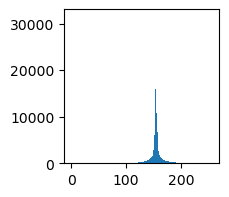

In [42]:
imagePath = "Portman.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)


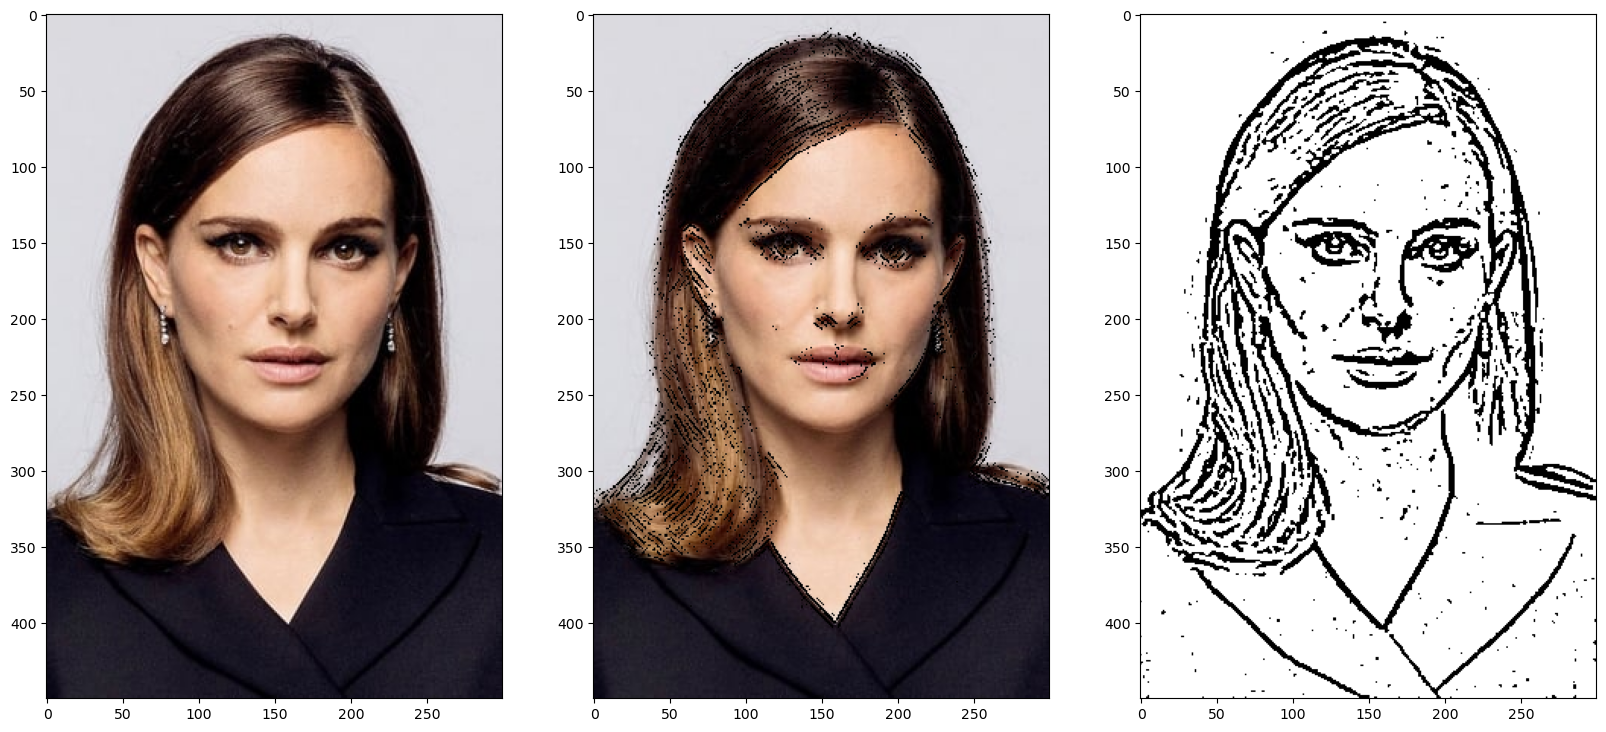

In [43]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage[:,:,::-1]);